In [61]:
import pandas as pd
import os

current_directory = os.getcwd()
print(f"\nCurrent working directory: {current_directory}\n")

path_data = "Datasets\groove-v1.0.0\groove"
filename = os.path.join(path_data, "info.csv")

data = pd.read_csv(filename, encoding="latin-1")
data.head()


Current working directory: c:\Users\kevin\Documents\MMI\Audio Data Science\StyleExtraction



,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test


In [62]:
data["style"].value_counts()

style
rock                       281
hiphop                      91
funk                        77
punk                        58
neworleans/funk             48
                          ... 
middleeastern                1
latin/bomba                  1
latin/merengue               1
rock/rockabilly              1
latin/venezuelan-joropo      1
Name: count, Length: 76, dtype: int64

In [63]:
# split style column into style1 and style2 where needed
data["style1"] = data["style"].apply(lambda x: x.split("/")[0] if "/" in x else x)
data["style2"] = data["style"].apply(lambda x: x.split("/")[1] if "/" in x else None)
data.head()

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split,style1,style2
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test,funk,groove1
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test,soul,groove10
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test,funk,groove2
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test,soul,groove3
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test,soul,groove4


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drummer         1150 non-null   object 
 1   session         1150 non-null   object 
 2   id              1150 non-null   object 
 3   style           1150 non-null   object 
 4   bpm             1150 non-null   int64  
 5   beat_type       1150 non-null   object 
 6   time_signature  1150 non-null   object 
 7   midi_filename   1150 non-null   object 
 8   audio_filename  1090 non-null   object 
 9   duration        1150 non-null   float64
 10  split           1150 non-null   object 
 11  style1          1150 non-null   object 
 12  style2          456 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 116.9+ KB


In [65]:
# drop all data where there is no audio file
data = data.dropna(subset=['audio_filename'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1133
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drummer         1090 non-null   object 
 1   session         1090 non-null   object 
 2   id              1090 non-null   object 
 3   style           1090 non-null   object 
 4   bpm             1090 non-null   int64  
 5   beat_type       1090 non-null   object 
 6   time_signature  1090 non-null   object 
 7   midi_filename   1090 non-null   object 
 8   audio_filename  1090 non-null   object 
 9   duration        1090 non-null   float64
 10  split           1090 non-null   object 
 11  style1          1090 non-null   object 
 12  style2          445 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 119.2+ KB


In [66]:
data.style1.value_counts()

style1
rock             315
funk             152
jazz             101
hiphop            93
latin             88
soul              63
afrocuban         60
punk              58
neworleans        51
country           29
pop               27
reggae            20
gospel            19
dance              5
afrobeat           4
blues              4
middleeastern      1
Name: count, dtype: int64

In [67]:
data.style2.value_counts()

style2
funk                     70
halftime                 37
brazilian-baiao          32
bembe                    30
purdieshuffle            30
rock                     20
fast                     20
rhumba                   19
samba                    19
motown                   16
soft                     13
swing                    11
fusion                   11
indie                     8
shuffle                   8
brazilian-samba           5
groove10                  4
groove1                   4
groove9                   4
groove8                   4
groove7                   4
groove6                   4
groove5                   4
groove4                   4
groove3                   4
groove2                   4
brazilian                 4
brazilian-ijexa           3
brazilian-songo           3
brazilian-sambareggae     3
march                     3
prog                      3
secondline                3
disco                     3
chacarera                 3
calypso      

rock               335
funk               222
jazz               101
hiphop              93
latin               90
soul                63
afrocuban           60
punk                58
neworleans          51
halftime            37
brazilian-baiao     32
bembe               30
purdieshuffle       30
country             29
pop                 27
fast                20
reggae              20
rhumba              19
samba               19
gospel              19
motown              16
soft                13
fusion              11
swing               11
shuffle              8
Name: count, dtype: int64


<Axes: ylabel='count'>

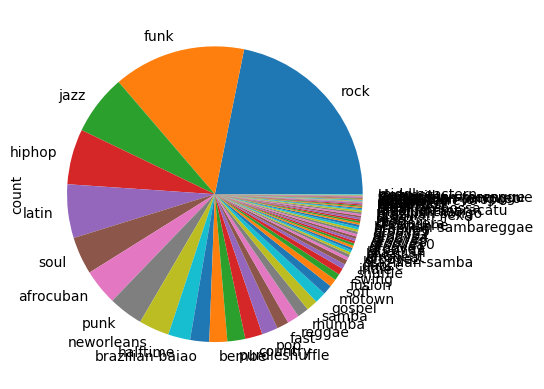

In [68]:
# value counts of seperated styles
style_counts = pd.concat([data.style1, data.style2]).value_counts()
print(style_counts.head(25))
style_counts.plot(kind="pie")